# Stock Market Analysis Project

We'll be analyzing stock data related to a few car companies, from Jan 1 2012 to Jan 1 2017. Keep in mind that this project is mainly just to practice your skills with matplotlib, pandas, and numpy. Don't infer financial trading advice from the analysis we do here!

### Part 0: Import

** Import the various libraries you will need-you can always just come back up here or import as you go along :) **

In [1]:
# This code imports the necessary libraries for numerical computing (NumPy), data manipulation and analysis (pandas), and plotting (matplotlib).
# The last line is a Jupyter notebook magic command that allows the plots to be displayed within the notebook.
# The code is importing the three libraries that are commonly used for data manipulation and visualization in data science: NumPy, pandas, and matplotlib.
# These libraries are widely used in the field of data science for tasks such as data manipulation, analysis, and visualization.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

____
## Part 1: Getting the Data

### Tesla Stock (Ticker: TSLA on the NASDAQ)

**  *Note! Not everyone will be working on a computer that will give them open access to download the stock information using pandas_datareader (firewalls, admin permissions, etc...). Because of this, the csv file for the Tesla is provided in a data folder inside this folder. It is called Tesla_Stock.csv. Feel free to just use this with read_csv! **

** Use pandas_datareader to obtain the historical stock information for Tesla from Jan 1, 2012 to Jan 1, 2017.**



In [2]:
# This code reads and manipulates stock data for Tesla, by loading a csv, converting the date column to a datetime format, setting it as the index, and displaying the first few rows.

tesla = pd.read_csv('Tesla_Stock.csv')
tesla['Date'] = pd.to_datetime(tesla['Date'])
tesla.set_index('Date', inplace=True)
tesla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052
2012-01-04,28.21,28.67,27.50,27.71,630036
2012-01-05,27.76,27.93,26.85,27.12,1005432
2012-01-06,27.20,27.79,26.41,26.89,687081
2012-01-09,27.00,27.49,26.12,27.25,896951


### Other Car Companies

** Repeat the same steps to grab data for Ford and GM (General Motors), **

In [3]:
# Now repeat for the other dataframes

ford = pd.read_csv('Ford_Stock.csv')
ford['Date'] = pd.to_datetime(ford['Date'])
ford.set_index('Date', inplace=True)
ford.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811
2012-01-04,11.15,11.53,11.07,11.30,79725188
2012-01-05,11.33,11.63,11.24,11.59,67877467
2012-01-06,11.74,11.80,11.52,11.71,59840605
2012-01-09,11.83,11.95,11.70,11.80,53981467


In [4]:
gm = pd.read_csv('GM_Stock.csv')
gm['Date'] = pd.to_datetime(gm['Date'])
gm.set_index('Date', inplace=True)
gm.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420
2012-01-04,21.05,21.37,20.75,21.15,7856752
2012-01-05,21.10,22.29,20.96,22.17,17884040
2012-01-06,22.26,23.03,22.24,22.92,18234608
2012-01-09,23.20,23.43,22.70,22.84,12091714


## Part 2: Visualizing the Data

** Time to visualize the data. **

** Follow along and recreate the plots below according to the instructions and explanations. **

____

** Recreate this linear plot of all the stocks' Open price ! Hint: For the legend, use label parameter and plt.legend()**

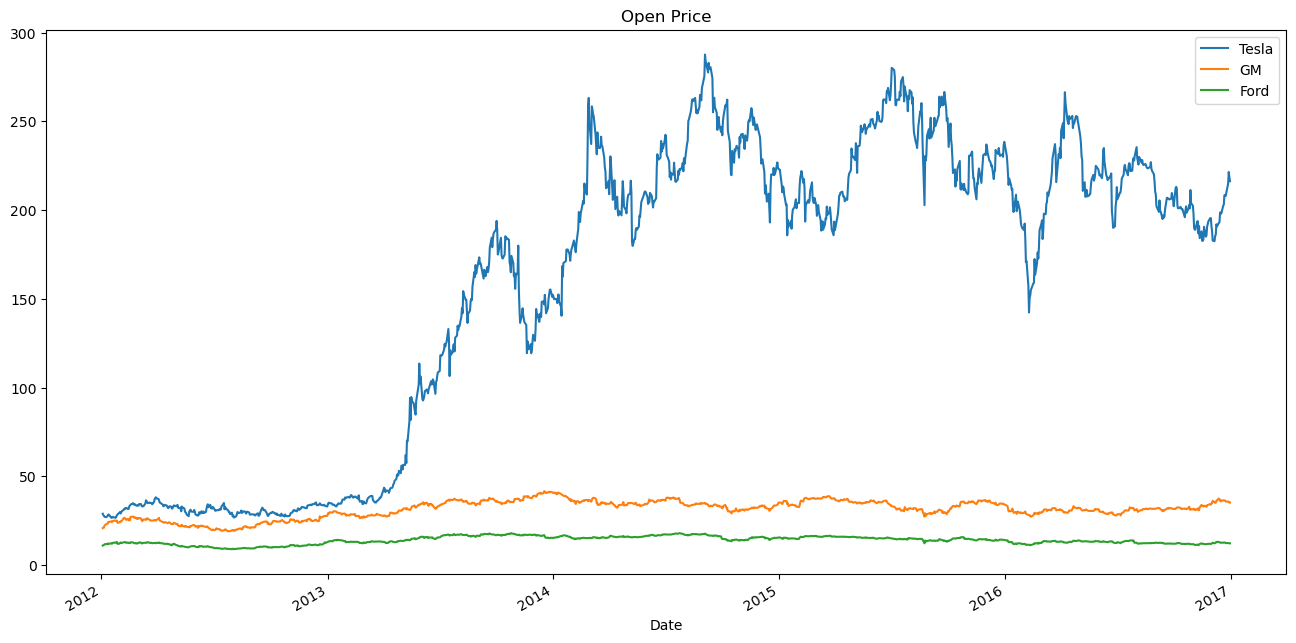

In [5]:
# This code creates a plot of the 'Open' column of the Tesla, GM and Ford stock data, using the 'plot' method from the pandas library. 
# It also sets the label of each plot as 'Tesla', 'GM' and 'Ford' respectively, sets the size of the figure to (16,8), sets the title of the plot as 'Open Price' and adds a legend to the plot using plt.legend() function. 
# This code is used for visualizing and comparing the open prices of the three car companies' stocks over time.

tesla['Open'].plot(label='Tesla',figsize=(16,8),title='Open Price')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend()

____

** Plot the Volume of stock traded each day.**

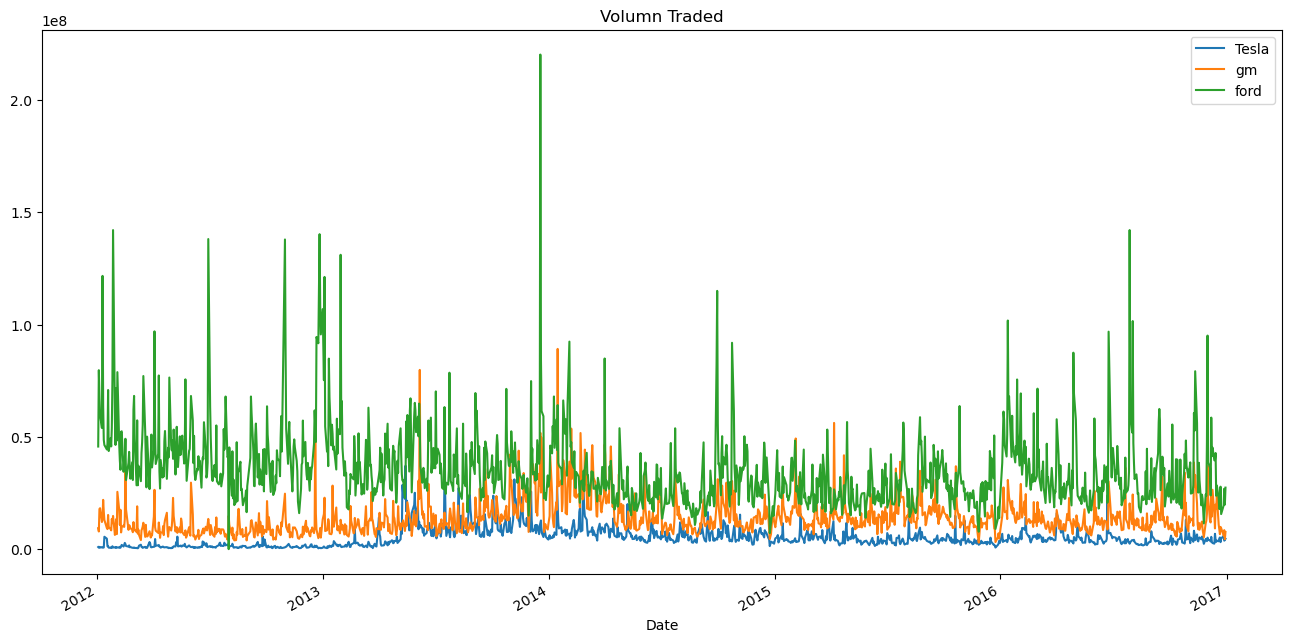

In [6]:
# This code creates a plot of the 'Volume' column of the Tesla, GM and Ford stock data using the 'plot' method from the pandas library. 
# It also sets the label of each plot as 'Tesla', 'GM' and 'Ford' respectively, sets the size of the figure to (16,8), sets the title of the plot as 'Volume Traded' and adds a legend to the plot using plt.legend() function. 
# This code is used for visualizing and comparing the volume of stocks traded of the three car companies over time.

tesla['Volume'].plot(label = 'Tesla', figsize = (16, 8), title = 'Volumn Traded')
gm['Volume'].plot(label = 'gm')
ford['Volume'].plot(label = 'ford')
plt.legend()

** Interesting, looks like Ford had a really big spike somewhere in late 2013. What was the date of this maximum trading volume for Ford?**

**Bonus: What happened that day? **

In [7]:
# This code is using the 'idxmax' method from pandas library to return the index label at which the maximum value of 'Volume' column for the Ford stock data is located. 
# This operation is used to find the date on which the highest volume of Ford stock was traded.

ford['Volume'].idxmax()

Timestamp('2013-12-18 00:00:00')

In [8]:
# What happened:
# http://money.cnn.com/2013/12/18/news/companies/ford-profit/
# https://www.usatoday.com/story/money/cars/2013/12/18/ford-2014-profit-warning/4110015/
# https://media.ford.com/content/dam/fordmedia/North%20America/US/2014/01/28/4QFinancials.pdf


____

** The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at \$10 each versus 100000 units of stock at $1 each)**

** Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.**

In [9]:
# This code creates new columns called 'Total Traded' for the Tesla, Ford, and GM stock data DataFrames by multiplying the 'Open' and 'Volume' columns of each DataFrame. 
# The new column 'Total Traded' represents the dollar amount of stocks traded in each day. 
# These new columns are used to calculate the total dollar amount traded for each stock over time.

tesla['Total Traded'] = tesla['Open'] * tesla['Volume']
ford['Total Traded'] = ford['Open'] * ford['Volume']
gm['Total Traded'] = gm['Open'] * gm['Volume']

** Plot this "Total Traded" against the time index.**

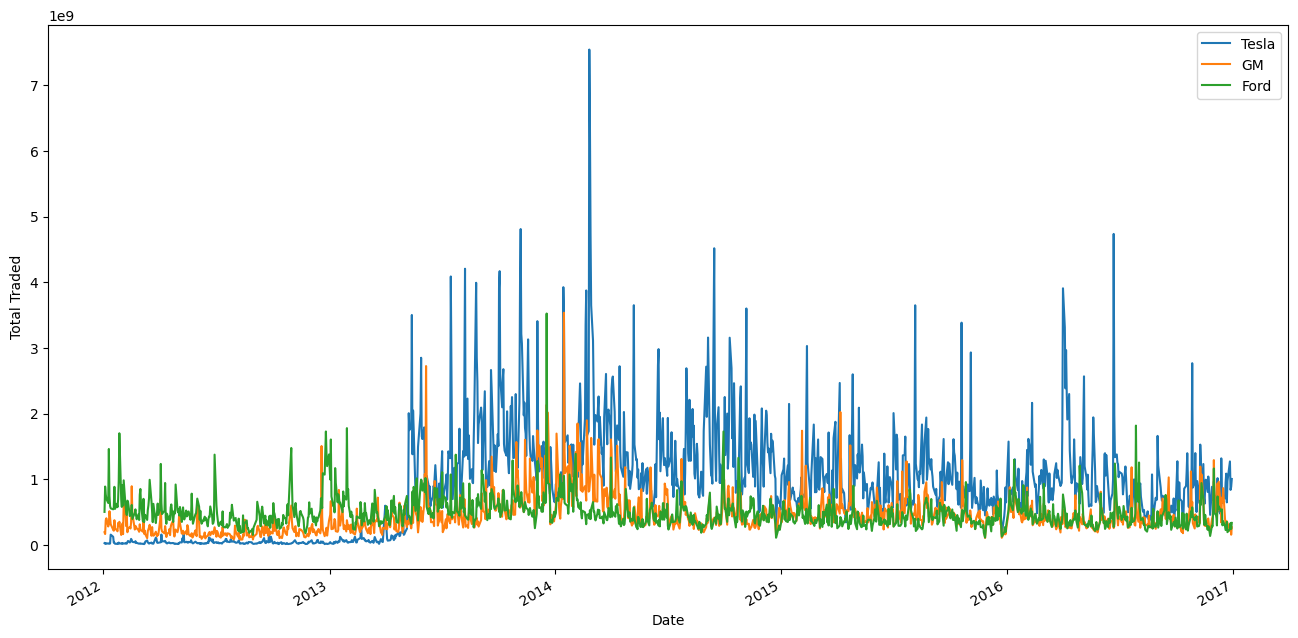

In [10]:
# This code creates a plot of the 'Total Traded' column of the Tesla, GM and Ford stock data using the 'plot' method from the pandas library.
# It also sets the label of each plot as 'Tesla', 'GM' and 'Ford' respectively, sets the size of the figure to (16,8), sets the ylabel as 'Total Traded' and adds a legend to the plot using plt.legend() function.
# And use plt.show() to show the plot.
# This code is used for visualizing and comparing the total dollar amount of stocks traded of the three car companies over time.

tesla['Total Traded'].plot(label = 'Tesla', figsize = (16, 8))
gm['Total Traded'].plot(label = 'GM')
ford['Total Traded'].plot(label = 'Ford')
plt.ylabel('Total Traded')
plt.legend()
plt.show()

** Interesting, looks like there was huge amount of money traded for Tesla somewhere in early 2014. What date was that and what happened? **

In [11]:
# This code is using the 'idxmax' method from pandas library to return the index label at which the maximum value of 'Total Traded' column for the Tesla stock data is located. 
# This operation is used to find the date on which the highest dollar amount of Tesla stock was traded.

tesla['Total Traded'].idxmax()

Timestamp('2014-02-25 00:00:00')

In [12]:
# http://money.cnn.com/2014/02/25/investing/tesla-record-high/
# https://blogs.wsj.com/moneybeat/2014/02/25/tesla-shares-surge-on-morgan-stanley-report/
# https://www.washingtonpost.com/news/wonk/wp/2014/02/25/teslas-stock-is-up-644-why-it-may-not-last/
# http://www.cnbc.com/2014/02/25/tesla-soars-ford-falls-in-consumer-reports-study.html

____

** Let's practice plotting out some MA (Moving Averages). Plot out the MA50 and MA200 for GM. **

<AxesSubplot: xlabel='Date'>

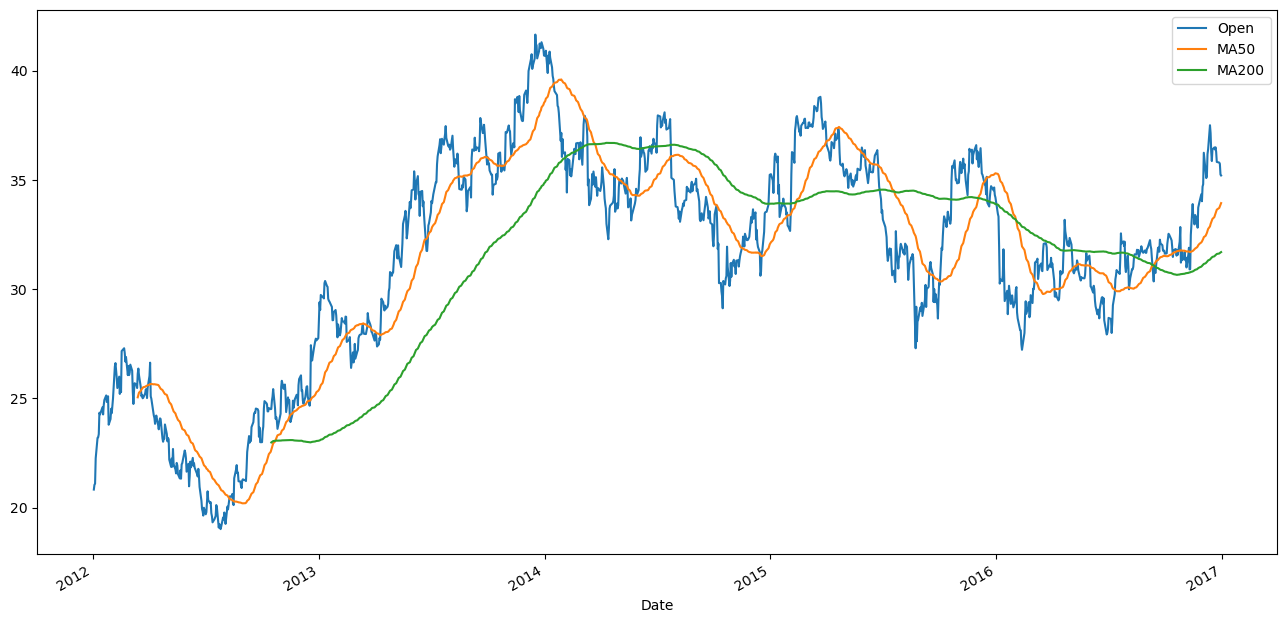

In [13]:
# This code creates two new columns, 'MA50' and 'MA200' for the GM stock data DataFrame by using the 'rolling' method, which applies a given function over a rolling window.
# The first line applies a mean function over a window of 50 days and the second line applies a mean function over a window of 200 days.
# Then it plots the 'Open' column and the newly created 'MA50' and 'MA200' columns of the GM stock data DataFrame, it also sets the label of each plot as 'gm', sets the size of the figure to (16,8).
# This code is used for visualizing the 50-day moving average and 200-day moving average of the GM stock data, which can help analysts to identify trends in the data over time.

gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open', 'MA50', 'MA200']].plot(label = 'gm', figsize = (16, 8))

______

** Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry. We can see this easily through a scatter matrix plot. Import scatter_matrix from pandas.plotting and use it to create a scatter matrix plot of all the stocks'opening price. You may need to rearrange the columns into a new single dataframe. Hints and info can be found here: https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot **

In [14]:
# This code imports the scatter_matrix function from the pandas.plotting module. 
# This function is used to create a matrix of scatter plots showing the relationship between multiple variables in a DataFrame.
# It allows the user to quickly visualize the relationships between different variables in the data and can be useful in identifying patterns or correlations in the data.


from pandas.plotting import scatter_matrix

In [15]:
# This code is using the 'concat' function from pandas library to concatenate the 'Open' column of the Tesla, GM, and Ford stock data DataFrames along the specified axis(axis=1 means concatenate along the columns).
# It creates a new DataFrame called 'car_comp' which contains the Open prices of Tesla, GM and Ford stock.
# This operation is used to combine the data from multiple stocks into a single DataFrame for further analysis.

car_comp = pd.concat([tesla['Open'], gm['Open'], ford['Open']], axis = 1)

In [16]:
# This code is using the 'columns' attribute of the DataFrame to rename the columns of the 'car_comp' DataFrame.
# The columns are renamed as 'Tesla Open', 'GM Open', 'Ford Open' respectively.
# This operation is used to make the column names more descriptive and easier to understand when working with the data.

car_comp.columns = ['Tesla Open', 'GM Open', 'Ford Open']

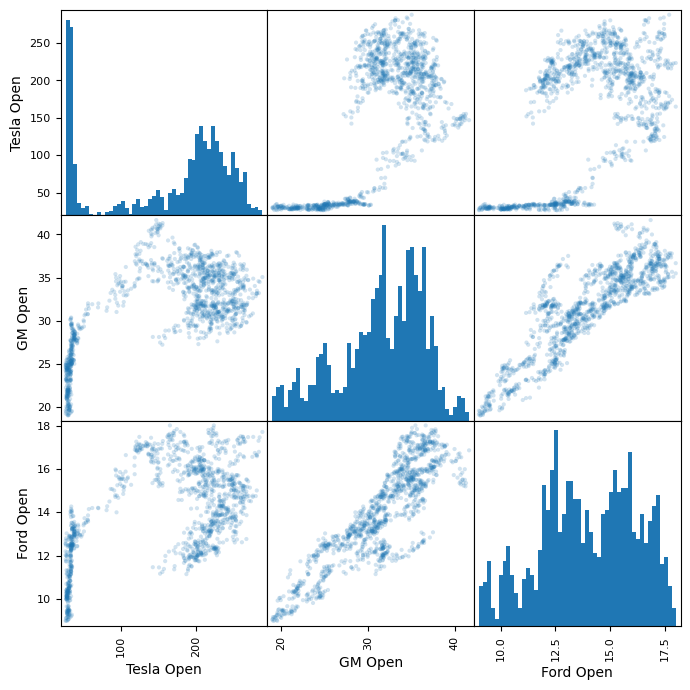

In [17]:
# This code is using the scatter_matrix function imported from pandas.plotting, to create a scatter plot matrix of the 'car_comp' DataFrame.
# The scatter_matrix function takes the DataFrame as an argument and plots a scatter plot of all combinations of columns in the DataFrame.
# It also sets the size of the figure to (8,8), sets the alpha value to 0.2 which controls the transparency of the dots, and specifies hist_kwds to show histograms with 50 bins on the diagonal of the matrix.
# This operation is used to visualize the relationship between the open prices of the three car companies' stocks.

scatter_matrix(car_comp, figsize = (8, 8), alpha = 0.2, hist_kwds = {'bins': 50});

____
# Part 3: Basic Financial Analysis

Now it is time to focus on a few key financial calculations. This will serve as your transition to the second half of the course. All you need to do is follow along with the instructions, this will mainly be an exercise in converting a mathematical equation or concept into code using python and pandas, something we will do often when working with quantiative data! If you feel very lost in this section, don't worry! Just go to the solutions lecture and treat it as a code-along lecture, use whatever style of learning works best for you!

Let's begin!
____

## Daily Percentage Change
First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

** Create a new column for each dataframe called returns. This column will be calculated from the Close price column. There are two ways to do this, either a simple calculation using the .shift() method that follows the formula above, or you can also use pandas' built in pct_change method. **

In [18]:
# using the .shift() method

tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1)) - 1

In [19]:
tesla.head()

,Open,High,Low,Close,Volume,Total Traded,returns
Date,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388


In [20]:
# using pandas' built in pct_change method.

tesla['returns'] = tesla['Close'].pct_change(1)

In [21]:
tesla.head()

,Open,High,Low,Close,Volume,Total Traded,returns
Date,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388


In [22]:
# Now repeat for the other dataframes

ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

In [23]:
ford.head()

,Open,High,Low,Close,Volume,Total Traded,returns
Date,,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08,NaN
2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08,0.015274
2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08,0.025664
2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08,0.010354
2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08,0.007686


In [24]:
gm.head()

,Open,High,Low,Close,Volume,Total Traded,MA50,MA200,returns
Date,,,,,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420,1.941652e+08,NaN,NaN,NaN
2012-01-04,21.05,21.37,20.75,21.15,7856752,1.653846e+08,NaN,NaN,0.004751
2012-01-05,21.10,22.29,20.96,22.17,17884040,3.773532e+08,NaN,NaN,0.048227
2012-01-06,22.26,23.03,22.24,22.92,18234608,4.059024e+08,NaN,NaN,0.033829
2012-01-09,23.20,23.43,22.70,22.84,12091714,2.805278e+08,NaN,NaN,-0.003490


** Now plot a histogram of each companies returns. Either do them separately, or stack them on top of each other. Which stock is the most "volatile"? (as judged by the variance in the daily returns we will discuss volatility in a lot more detail in future lectures.)**

<AxesSubplot: >

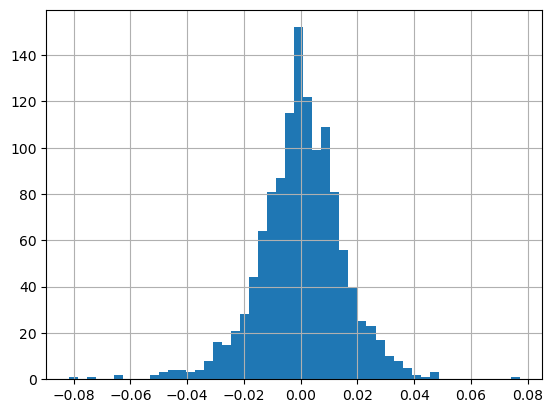

In [25]:
# This code is creating a histogram of the 'returns' column of the Ford stock data DataFrame.
# The 'hist' method from pandas library is used to create a histogram of the data with 50 bins.
# This operation is used to visualize the distribution of the daily returns of the Ford stock, which can be useful in identifying patterns or trends in the stock's performance over time.

ford['returns'].hist(bins = 50)

<AxesSubplot: >

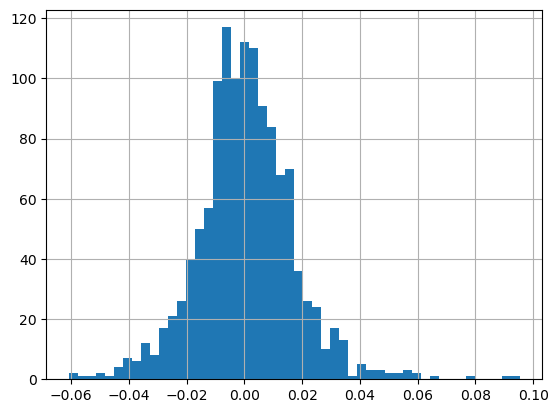

In [26]:
# Now repeat for the other dataframes

gm['returns'].hist(bins = 50)

<AxesSubplot: >

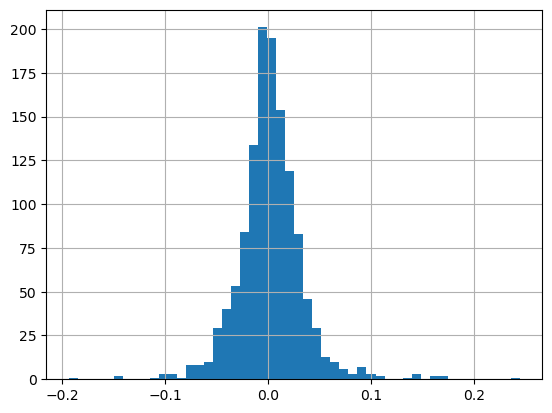

In [27]:
tesla['returns'].hist(bins = 50)

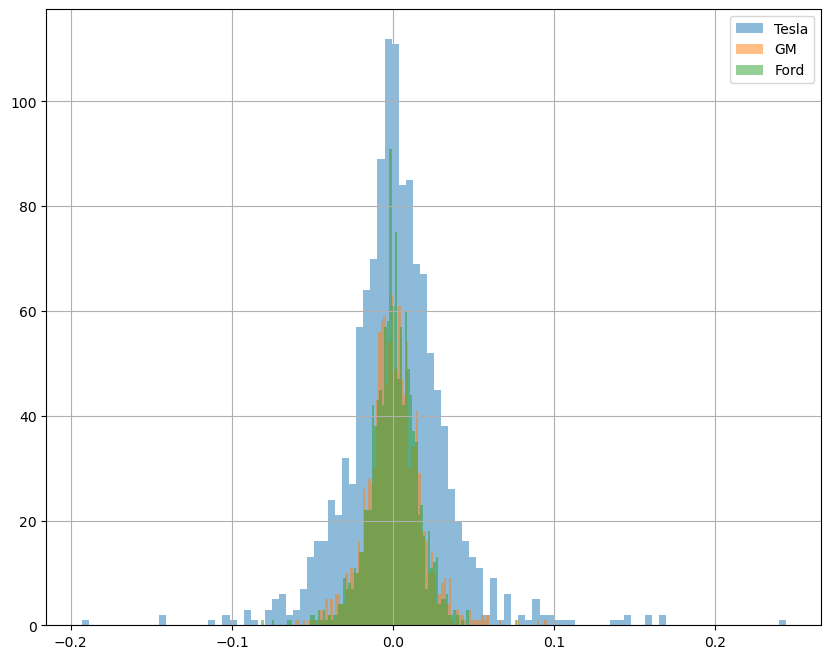

In [28]:
# This code creates a histogram of the 'returns' column of the Tesla, GM, and Ford stock data DataFrames.
# It uses the 'hist' method from pandas library to create a histogram of the data with 100 bins.
# It also sets the label of each histogram as 'Tesla', 'GM', and 'Ford' respectively, sets the size of the figure to (10,8), sets the alpha value to 0.5 which controls the transparency of the histogram and adds a legend to the plot using plt.legend().
# This operation is used to visualize the distribution of the daily returns of the three car companies' stocks and compare the performance of each stock.

tesla['returns'].hist(bins = 100, label = 'Tesla', figsize = (10, 8), alpha = 0.5)
gm['returns'].hist(bins = 100, label = 'GM', alpha = 0.5)
ford['returns'].hist(bins = 100, label = 'Ford', alpha = 0.5)
plt.legend()

** Try also plotting a KDE instead of histograms for another view point. Which stock has the widest plot? **

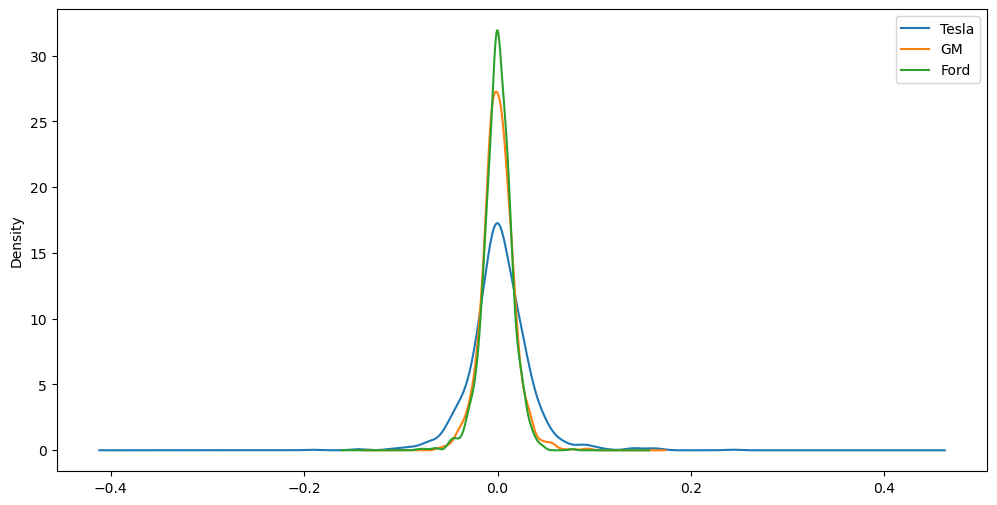

In [29]:
# This code creates a kde plot of the 'returns' column of the Tesla, GM, and Ford stock data DataFrames.
# It uses the 'plot' method from pandas library with "kind" parameter set as 'kde' to create a kernel density estimation plot of the data.
# It also sets the label of each plot as 'Tesla', 'GM', and 'Ford' respectively, sets the size of the figure to (12,6), and adds a legend to the plot using plt.legend().
# This operation is used to visualize the probability density function of the daily returns of the three car companies' stocks and compare the performance of each stock.

tesla['returns'].plot(kind = 'kde', label = 'Tesla', figsize = (12, 6))
gm['returns'].plot(kind = 'kde', label = 'GM')
ford['returns'].plot(kind = 'kde', label = 'Ford')
plt.legend()

** Try also creating some box plots comparing the returns. **

<AxesSubplot: >

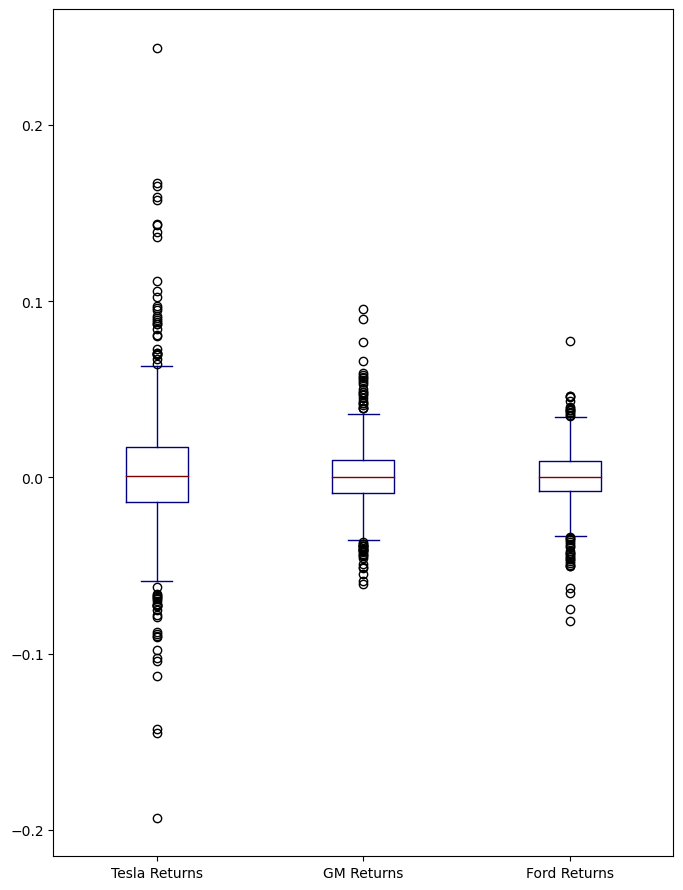

In [30]:
# This code creates a box plot of the 'returns' column of the Tesla, GM, and Ford stock data DataFrames.
# It uses the 'concat' function from pandas library to concatenate the 'returns' column of the Tesla, GM, and Ford stock data DataFrames along the specified axis(axis=1 means concatenate along the columns).
# It creates a new DataFrame called 'box_df' which contains the returns of Tesla, GM and Ford stock.
# Then it uses the 'plot' method from pandas library with "kind" parameter set as 'box' to create a box plot of the data.
# It also sets the column names of the new DataFrame as 'Tesla Returns', 'GM Returns', 'Ford Returns' respectively, sets the size of the figure to (8,11), and sets the colormap parameter to 'jet' to change the color of the boxplot.
# This operation is used to visualize the distribution of the returns of the three car companies' stocks and compare the performance of each stock.

box_df = pd.concat([tesla['returns'], gm['returns'], ford['returns']], axis = 1)
box_df.columns = ['Tesla Returns', 'GM Returns', 'Ford Returns']
box_df.plot(kind = 'box', figsize = (8, 11), colormap = 'jet')

## Comparing Daily Returns between Stocks

** Create a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the car companies are. Is Tesla begin treated more as a technology company rather than a car company by the market?**

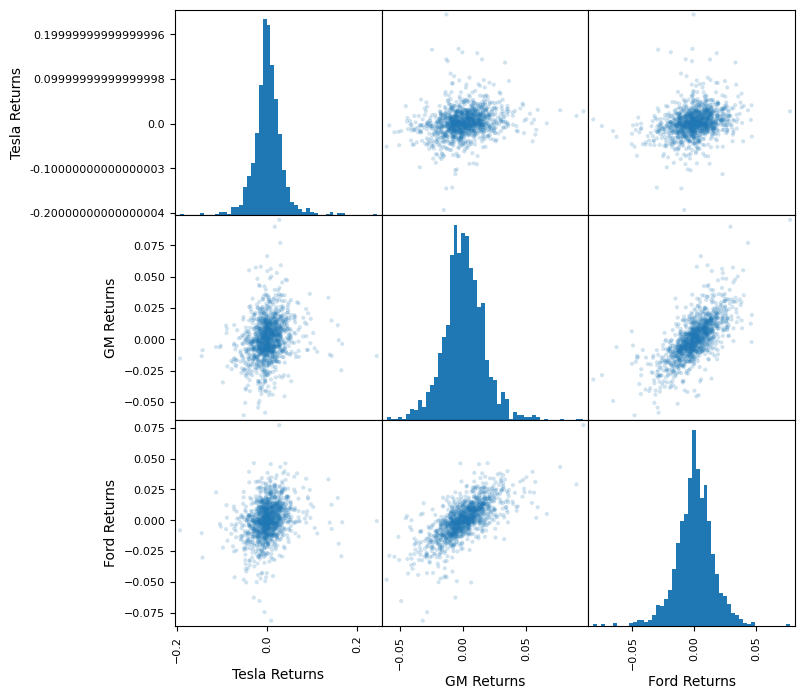

In [31]:
# This code is using the scatter_matrix function imported from pandas.plotting, to create a scatter plot matrix of the 'box_df' DataFrame. 
# The scatter_matrix function takes the DataFrame as an argument and plots a scatter plot of all combinations of columns in the DataFrame.
# It also sets the size of the figure to (8,8), sets the alpha value to 0.2 which controls the transparency of the dots, and specifies hist_kwds to show histograms with 50 bins on the diagonal of the matrix.
# This operation is used to visualize the relationship between the returns of the three car companies' stocks.

scatter_matrix(box_df, figsize = (8, 8), alpha = 0.2, hist_kwds = {'bins': 50});

** It looks like Ford and GM do have some sort of possible relationship, let's plot just these two against eachother in scatter plot to view this more closely!**

<AxesSubplot: xlabel='GM Returns', ylabel='Ford Returns'>

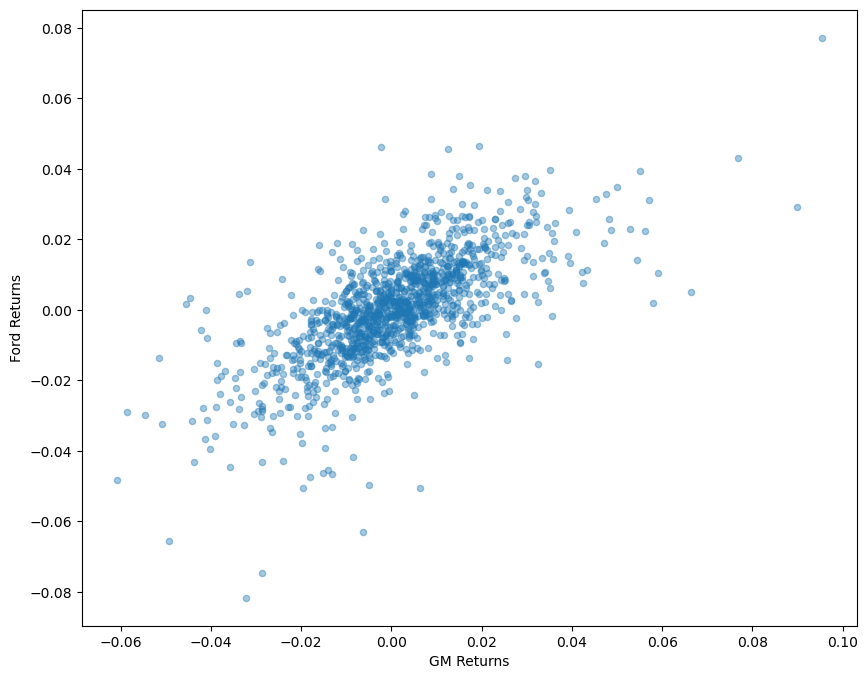

In [32]:
# This code creates a scatter plot of the 'GM Returns' column of the box_df DataFrame against the 'Ford Returns' column.
# It uses the 'plot' method from pandas library with "kind" parameter set as 'scatter' to create a scatter plot of the data.
# It also sets the x-axis as 'GM Returns' and y-axis as 'Ford Returns', sets the alpha value to 0.4 which controls the transparency of the dots, and sets the size of the figure to (10,8).
# This operation is used to visualize the relationship between the returns of the GM and Ford stocks, and investigate if there's any correlation or pattern between these two stocks' returns.

box_df.plot(kind = 'scatter', x = 'GM Returns', y = 'Ford Returns', alpha = 0.4, figsize = (10, 8))

____
## Cumulative Daily Returns

Great! Now we can see which stock was the most wide ranging in daily returns (you should have realized it was Tesla, our original stock price plot should have also made that obvious).

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. Let's look at some simple examples:

Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

** Create a cumulative daily return column for each car company's dataframe.**

In [33]:
# This code creates a new column named 'Cumulative Return' in the Tesla stock data DataFrame by calculating the cumulative product of (1+returns) for each day.
# The new column is calculated by using the 'cumprod' function, which calculates the cumulative product of the elements in a series.
# This operation is used to calculate the cumulative return of the stock, which can be used in further analysis of the stock's performance over time.

tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()

In [34]:
# This code is calling the 'head' method on the Tesla stock data DataFrame, which returns the first n rows of the DataFrame (by default n=5)
# This operation is used to display the first few rows of the DataFrame, and check the DataFrame's structure, or to see if the previous operations have been applied correctly on the Tesla stock data DataFrame.

tesla.head()

,Open,High,Low,Close,Volume,Total Traded,returns,Cumulative Return
Date,,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177,0.986823
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292,0.965812
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481,0.957621
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388,0.970442


In [35]:
# Now repeat for the other dataframes

ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

** Now plot the Cumulative Return columns against the time series index. Which stock showed the highest return for a $1 invested? Which showed the lowest?**

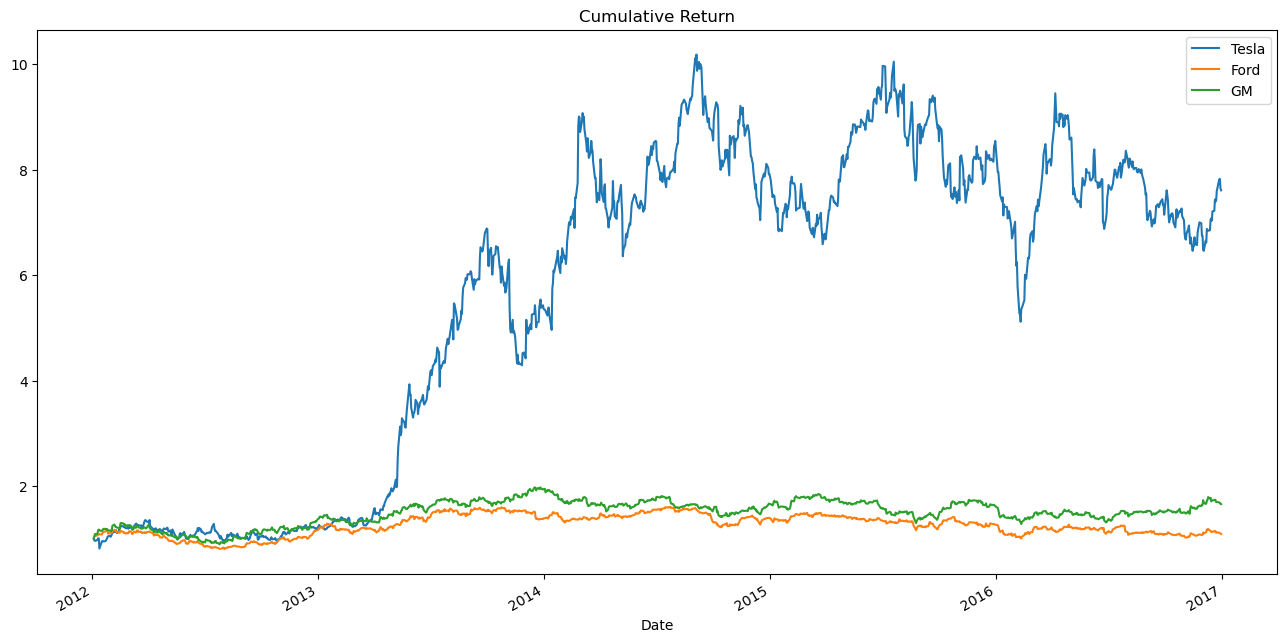

In [36]:
# This code creates a line plot of the 'Cumulative Return' column of the Tesla, GM, and Ford stock data DataFrames.
# It uses the 'plot' method from pandas library to create a line plot of the data.
# It also sets the label of each plot as 'Tesla', 'GM', and 'Ford' respectively, sets the size of the figure to (16,8), and adds a title to the plot using plt.title('Cumulative Return').
# It also adds a legend to the plot using plt.legend().
# This operation is used to visualize the cumulative return of the three car companies' stocks over time and compare the performance of each stock.

tesla['Cumulative Return'].plot(label = 'Tesla', figsize = (16, 8), title = 'Cumulative Return')
ford['Cumulative Return'].plot(label = 'Ford')
gm['Cumulative Return'].plot(label = 'GM')
plt.legend()

# Great Job!

That is it for thsi very basic analysis, this concludes this half of the course, which focuses much more on learning the tools of the trade. The second half of the course is where we really dive into functionality designed for time series, quantitative analysis, algorithmic trading, and much more!